In [2]:
# run this to shorten the data import from the files
path_data = '/home/nero/Documents/Estudos/DataCamp/Python/Supervised_Learning_with_scikit-learn/Data/'
# base modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
# importing data for the model
data_path = path_data + 'music_df.csv'
music_df = pd.read_csv(data_path, usecols = ['popularity', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'valence', 'genre'])

print(music_df.info())
music_df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        1000 non-null   float64
 1   acousticness      1000 non-null   float64
 2   danceability      1000 non-null   float64
 3   duration_ms       1000 non-null   float64
 4   energy            1000 non-null   float64
 5   instrumentalness  1000 non-null   float64
 6   liveness          1000 non-null   float64
 7   loudness          1000 non-null   float64
 8   speechiness       1000 non-null   float64
 9   tempo             1000 non-null   float64
 10  valence           1000 non-null   float64
 11  genre             1000 non-null   object 
dtypes: float64(11), object(1)
memory usage: 93.9+ KB
None


Index(['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'genre'],
      dtype='object')

In [39]:
# exercise 01

"""
Creating dummy variables

Being able to include categorical features in the model building process can enhance performance as they may add information that contributes to prediction accuracy.

The music_df dataset has been preloaded for you, and its shape is printed. Also, pandas has been imported as pd.

Now you will create a new DataFrame containing the original columns of music_df plus dummy variables from the "genre" column.
"""

# Instructions

"""

    Use a relevant function, passing the entire music_df DataFrame, to create music_dummies, dropping the first binary column.
    Print the shape of music_dummies.

"""

# solution

# Create music_dummies
music_dummies = pd.get_dummies(music_df['genre'], drop_first=True)
music_dummies = pd.concat([music_df, music_dummies], axis=1)
music_dummies = music_dummies.drop("genre", axis=1)
# Print the new DataFrame's shape
print("Shape of music_dummies: {}".format(music_dummies.shape))

#----------------------------------#

# Conclusion

"""
As there were ten values in the "genre" column, nine new columns were added by a call of pd.get_dummies() using drop_first=True. After dropping the original "genre" column, there are still eight new columns in the DataFrame!
"""

Shape of music_dummies: (1000, 20)


'\nAs there were ten values in the "genre" column, nine new columns were added by a call of pd.get_dummies() using drop_first=True. After dropping the original "genre" column, there are still eight new columns in the DataFrame!\n'

In [40]:
# load modules for model
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import Ridge
# Create a KFold object
kf = KFold(n_splits=5, random_state=42, shuffle=True)

In [41]:
# exercise 02

"""
Regression with categorical features

Now you have created music_dummies, containing binary features for each song's genre, it's time to build a ridge regression model to predict song popularity.

music_dummies has been preloaded for you, along with Ridge, cross_val_score, numpy as np, and a KFold object stored as kf.

The model will be evaluated by calculating the average RMSE, but first, you will need to convert the scores for each fold to positive values and take their square root. This metric shows the average error of our model's predictions, so it can be compared against the standard deviation of the target value—"popularity".
"""

# Instructions

"""

    Create X, containing all features in music_dummies, and y, consisting of the "popularity" column, respectively.
    Instantiate a ridge regression model, setting alpha equal to 0.2.
    Perform cross-validation on X and y using the ridge model, setting cv equal to kf, and using negative mean squared error as the scoring metric.
    Print the RMSE values by converting negative scores to positive and taking the square root.

"""

# solution

# Create X and y
X = music_dummies.drop('popularity', axis = 1).values
y = music_dummies['popularity'].values

# Instantiate a ridge model
ridge = Ridge(alpha = 0.2)

# Perform cross-validation
scores = cross_val_score(ridge, X, y, cv=kf, scoring="neg_mean_squared_error")

# Calculate RMSE
rmse = np.sqrt(-scores)
print("Average RMSE: {}".format(np.mean(rmse)))
print("Standard Deviation of the target array: {}".format(np.std(y)))

#----------------------------------#

# Conclusion

"""
Great work! An average RMSE of approximately 8.24 is lower than the standard deviation of the target variable (song popularity), suggesting the model is reasonably accurate.
"""

Average RMSE: 8.236853840202299
Standard Deviation of the target array: 14.02156909907019


'\nGreat work! An average RMSE of approximately 8.24 is lower than the standard deviation of the target variable (song popularity), suggesting the model is reasonably accurate.\n'

In [43]:
# exercise 03

"""
Dropping missing data

Over the next three exercises, you are going to tidy the music_df dataset. You will create a pipeline to impute missing values and build a KNN classifier model, then use it to predict whether a song is of the "Rock" genre.

In this exercise specifically, you will drop missing values accounting for less than 5% of the dataset, and convert the "genre" column into a binary feature.
"""

# Instructions

"""
Print the number of missing values for each column in the music_df dataset, sorted in ascending order.
---
Remove values for all columns with 50 or fewer missing values.
---
Convert music_df["genre"] to values of 1 if the row contains "Rock", otherwise change the value to 0.
"""

# solution

# Print missing values for each column
print(music_df.isna().sum().sort_values())

#----------------------------------#

# Print missing values for each column
print(music_df.isna().sum().sort_values())

# Remove values where less than 5% are missing
music_df = music_df.dropna(subset=['genre','popularity','loudness','liveness','tempo'])

#----------------------------------#

# Print missing values for each column
print(music_df.isna().sum().sort_values())

# Remove values where less than 5% are missing
music_df = music_df.dropna(subset=["genre", "popularity", "loudness", "liveness", "tempo"])

# Convert genre to a binary feature
music_df["genre"] = np.where(music_df["genre"] == "Rock", 1, 0)

print(music_df.isna().sum().sort_values())
print("Shape of the `music_df`: {}".format(music_df.shape))



#----------------------------------#

# Conclusion

"""
Well done! The dataset has gone from 1000 observations down to 892, but it is now in the correct format for binary classification and the remaining missing values can be imputed as part of a pipeline.
"""

popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
genre               0
dtype: int64
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
genre               0
dtype: int64
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
genre               0
dtype: int64
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness       

'\nWell done! The dataset has gone from 1000 observations down to 892, but it is now in the correct format for binary classification and the remaining missing values can be imputed as part of a pipeline.\n'

In [45]:
# import modules 
from sklearn.neighbors import KNeighborsClassifier 

In [46]:
# exercise 04

"""
Pipeline for song genre prediction: I

Now it's time to build a pipeline. It will contain steps to impute missing values using the mean for each feature and build a KNN model for the classification of song genre.

The modified music_df dataset that you created in the previous exercise has been preloaded for you, along with KNeighborsClassifier and train_test_split.
"""

# Instructions

"""

    Import SimpleImputer and Pipeline.
    Instantiate an imputer.
    Instantiate a KNN classifier with three neighbors.
    Create steps, a list of tuples containing the imputer variable you created, called "imputer", followed by the knn model you created, called "knn".

"""

# solution

# Import modules
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Instantiate an imputer
imputer = SimpleImputer(strategy="most_frequent")

# Instantiate a knn model
knn = KNeighborsClassifier(n_neighbors = 3)

# Build steps for the pipeline
steps = [("imputer", imputer), 
         ("knn", knn)]

#----------------------------------#

# Conclusion

"""
Perfect pipeline skills! You are now ready to build and evaluate a song genre classification model
"""

'\nPerfect pipeline skills! You are now ready to build and evaluate a song genre classification model\n'

In [58]:
# import modules
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# changing df 
data_path = path_data + 'music_clean.csv'
music_df = pd.read_csv(data_path)

X = music_df.drop('genre', axis = 1).values
y = music_df['genre'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

imp_mean = SimpleImputer()

display(X.shape)
y.shape

(1000, 12)

(1000,)

In [59]:
# exercise 05

"""
Pipeline for song genre prediction: II

Having set up the steps of the pipeline in the previous exercise, you will now use it on the music_df dataset to classify the genre of songs. What makes pipelines so incredibly useful is the simple interface that they provide.

X_train, X_test, y_train, and y_test have been preloaded for you, and confusion_matrix has been imported from sklearn.metrics.
"""

# Instructions

"""

    Create a pipeline using the steps you previously defined.
    Fit the pipeline to the training data.
    Make predictions on the test set.
    Calculate and print the confusion matrix.

"""

# solution

steps = [("imputer", imp_mean),
        ("knn", knn)]

# Create the pipeline
pipeline = Pipeline(steps)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

#----------------------------------#

# Conclusion

"""
Excellent! See how easy it is to scale our model building workflow using pipelines. In this case, the confusion matrix highlights that the model had 79 true positives and 82 true negatives!
"""

[[92 12]
 [ 0 96]]


'\nExcellent! See how easy it is to scale our model building workflow using pipelines. In this case, the confusion matrix highlights that the model had 79 true positives and 82 true negatives!\n'

In [62]:
# preparations for the model
from sklearn.linear_model import Lasso

X = music_df.drop('loudness', axis = 1)
y = music_df['loudness'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
# exercise 06

"""
Centering and scaling for regression

Now you have seen the benefits of scaling your data, you will use a pipeline to preprocess the music_df features and build a lasso regression model to predict a song's loudness.

X_train, X_test, y_train, and y_test have been created from the music_df dataset, where the target is "loudness" and the features are all other columns in the dataset. Lasso and Pipeline have also been imported for you.

Note that "genre" has been converted to a binary feature where 1 indicates a rock song, and 0 represents other genres.
"""

# Instructions

"""

    Import StandardScaler.
    Create the steps for the pipeline object, a StandardScaler object called "scaler", and a lasso model called "lasso" with alpha set to 0.5.
    Instantiate a pipeline with steps to scale and build a lasso regression model.
    Calculate the R-squared value on the test data.

"""

# solution

# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Create pipeline steps
steps = [("scaler", StandardScaler()),
         ("lasso", Lasso(alpha=0.5))]

# Instantiate the pipeline
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

# Calculate and print R-squared
print(pipeline.score(X_test, y_test))

#----------------------------------#

# Conclusion

"""
Awesome scaling! The model may have only produced an R-squared of 0.619, but without scaling this exact model would have only produced a score of 0.35, which proves just how powerful scaling can be!
"""

0.720065318543369


'\nAwesome scaling! The model may have only produced an R-squared of 0.619, but without scaling this exact model would have only produced a score of 0.35, which proves just how powerful scaling can be!\n'

In [69]:
# import modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# preparing variables for them model
X = music_df.drop('genre', axis = 1)
y = music_df['genre'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [70]:
# exercise 07

"""
Centering and scaling for classification

Now you will bring together scaling and model building into a pipeline for cross-validation.

Your task is to build a pipeline to scale features in the music_df dataset and perform grid search cross-validation using a logistic regression model with different values for the hyperparameter C. The target variable here is "genre", which contains binary values for rock as 1 and any other genre as 0.

StandardScaler, LogisticRegression, and GridSearchCV have all been imported for you.
"""

# Instructions

"""

    Build the steps for the pipeline: a StandardScaler() object named "scaler", and a logistic regression model named "logreg".
    Create the parameters, searching 20 equally spaced float values ranging from 0.001 to 1.0 for the logistic regression model's C hyperparameter within the pipeline.
    Instantiate the grid search object.
    Fit the grid search object to the training data.

"""

# solution

# Build the steps
steps = [("scaler", StandardScaler()),
         ("logreg", LogisticRegression())]
pipeline = Pipeline(steps)

# Create the parameter space
parameters = {"logreg__C": np.linspace(0.001, 1.0, 20)}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=21)

# Instantiate the grid search object
cv = GridSearchCV(pipeline, param_grid=parameters)

# Fit to the training data
cv.fit(X_train, y_train)
print(cv.best_score_, "\n", cv.best_params_)

#----------------------------------#

# Conclusion

"""
Well done! Using a pipeline shows that a logistic regression model with "C" set to approximately 0.1 produces a model with 0.8425 accuracy!
"""

0.9275 
 {'logreg__C': 0.5793684210526315}


'\nWell done! Using a pipeline shows that a logistic regression model with "C" set to approximately 0.1 produces a model with 0.8425 accuracy!\n'

In [73]:
# importing modules
from sklearn.linear_model import LinearRegression
# preparing variables for them model
X = music_df.drop('energy', axis = 1)
y = music_df['energy'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

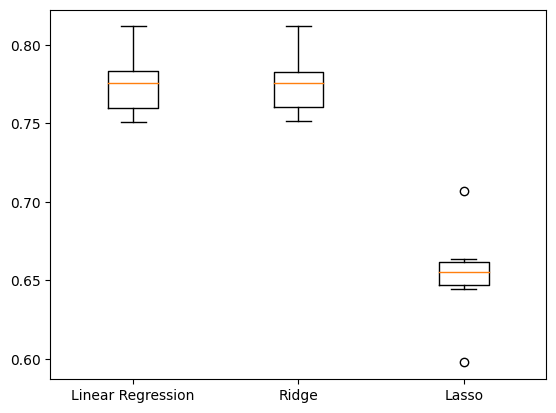

"\nNicely done! Lasso regression is not a good model for this problem, while linear regression and ridge perform fairly equally. Let's make predictions on the test set, and see if the RMSE can guide us on model selection.\n"

In [74]:
# exercise 08

"""
Visualizing regression model performance

Now you have seen how to evaluate multiple models out of the box, you will build three regression models to predict a song's "energy" levels.

The music_df dataset has had dummy variables for "genre" added. Also, feature and target arrays have been created, and these have been split into X_train, X_test, y_train, and y_test.

The following have been imported for you: LinearRegression, Ridge, Lasso, cross_val_score, and KFold.
"""

# Instructions

"""

    Write a for loop using model as the iterator, and model.values() as the iterable.
    Perform cross-validation on the training features and the training target array using the model, setting cv equal to the KFold object.
    Append the model's cross-validation scores to the results list.
    Create a box plot displaying the results, with the x-axis labels as the names of the models.

"""

# solution

models = {"Linear Regression": LinearRegression(), "Ridge": Ridge(alpha=0.1), "Lasso": Lasso(alpha=0.1)}
results = []

# Loop through the models' values
for model in models.values():
  kf = KFold(n_splits=6, random_state=42, shuffle=True)
  
  # Perform cross-validation
  cv_scores = cross_val_score(model, X_train, y_train, cv=kf)
  
  # Append the results
  results.append(cv_scores)

# Create a box plot of the results
plt.boxplot(results, labels=models.keys())
plt.show()

#----------------------------------#

# Conclusion

"""
Nicely done! Lasso regression is not a good model for this problem, while linear regression and ridge perform fairly equally. Let's make predictions on the test set, and see if the RMSE can guide us on model selection.
"""

In [103]:
# importing arrays to model
path_data = '/home/nero/Documents/Estudos/DataCamp/Python/Supervised_Learning_with_scikit-learn/Data/'
cols_to_use = [1,2,3,4,5,6,7,8,9,10,11]
X_train_scaled = np.array(pd.read_csv(path_data+'X_train_scaled.csv', usecols=cols_to_use))
X_test_scaled = np.array(pd.read_csv(path_data+'X_test_scaled.csv', usecols=cols_to_use))
y_test = np.array(pd.read_csv(path_data+'y_test.csv', usecols=[1]))
y_train = np.array(pd.read_csv(path_data+'y_train.csv', usecols=[1]))

y_test.shape

(250, 1)

In [104]:
# exercise 09

"""
Predicting on the test set

In the last exercise, linear regression and ridge appeared to produce similar results. It would be appropriate to select either of those models; however, you can check predictive performance on the test set to see if either one can outperform the other.

You will use root mean squared error (RMSE) as the metric. The dictionary models, containing the names and instances of the two models, has been preloaded for you along with the training and target arrays X_train_scaled, X_test_scaled, y_train, and y_test.
"""

# Instructions

"""

    Import mean_squared_error.
    Fit the model to the scaled training features and the training labels.
    Make predictions using the scaled test features.
    Calculate RMSE by passing the test set labels and the predicted labels.

"""

# solution

# Import mean_squared_error
from sklearn.metrics import mean_squared_error

for name, model in models.items():
  
  # Fit the model to the training data
  model.fit(X_train_scaled, y_train)
  
  # Make predictions on the test set
  y_pred = model.predict(X_test_scaled)
  
  # Calculate the test_rmse
  test_rmse = mean_squared_error(y_test, y_pred, squared=False)
  print("{} Test Set RMSE: {}".format(name, test_rmse))

#----------------------------------#

# Conclusion

"""
The linear regression model just edges the best performance, although the difference is a RMSE of 0.00001 for popularity! Now let's look at classification model selection.
"""

Linear Regression Test Set RMSE: 0.11988851505947569
Ridge Test Set RMSE: 0.11988670759613457
Lasso Test Set RMSE: 0.16466821922544136


"\nThe linear regression model just edges the best performance, although the difference is a RMSE of 0.00001 for popularity! Now let's look at classification model selection.\n"

In [110]:
# import modules
from sklearn.tree import DecisionTreeClassifier

# importing arrays to model
path_data = '/home/nero/Documents/Estudos/DataCamp/Python/Supervised_Learning_with_scikit-learn/Data/'
cols_to_use = [1,2,3,4,5,6,7,8,9,10,11]
X_train_scaled = np.array(pd.read_csv(path_data+'X_train_scaled-10.csv', usecols=cols_to_use))
y_train = np.array(pd.read_csv(path_data+'y_train-10.csv', usecols=[1]))
X_test = np.array(pd.read_csv(path_data+'X_test-10.csv', usecols=cols_to_use))
y_test = np.array(pd.read_csv(path_data+'y_test-10.csv', usecols=[1]))

/home/nero/Documents/Estudos/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nero/Documents/Estudos/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nero/Documents/Estudos/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nero/Documents/Estudos/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y 

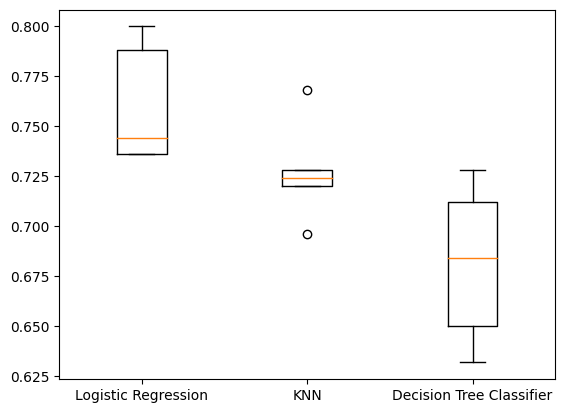

"\nLooks like logistic regression is the best candidate based on the cross-validation results! Let's wrap up by building a pipeline\n"

In [108]:
# exercise 10

"""
Visualizing classification model performance

In this exercise, you will be solving a classification problem where the "popularity" column in the music_df dataset has been converted to binary values, with 1 representing popularity more than or equal to the median for the "popularity" column, and 0 indicating popularity below the median.

Your task is to build and visualize the results of three different models to classify whether a song is popular or not.

The data has been split, scaled, and preloaded for you as X_train_scaled, X_test_scaled, y_train, and y_test. Additionally, KNeighborsClassifier, DecisionTreeClassifier, and LogisticRegression have been imported.
"""

# Instructions

"""
Looks like logistic regression is the best candidate based on the cross-validation results! Let's wrap up by building a pipeline
"""

# solution

# Create models dictionary
models = {"Logistic Regression": LogisticRegression(), "KNN": KNeighborsClassifier(), "Decision Tree Classifier": DecisionTreeClassifier()}
results = []

# Loop through the models' values
for model in models.values():
  
  # Instantiate a KFold object
  kf = KFold(n_splits=6, random_state=12, shuffle=True)
  
  # Perform cross-validation
  cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)
  results.append(cv_results)
plt.boxplot(results, labels=models.keys())
plt.show()

#----------------------------------#

# Conclusion

"""
Looks like logistic regression is the best candidate based on the cross-validation results! Let's wrap up by building a pipeline
"""

In [126]:
# preparing variables for them model
X = music_df.drop('genre', axis = 1)
y = music_df['genre'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_test = y_test.ravel()
y_train = y_train.ravel()

In [127]:
# exercise 11

"""
Pipeline for predicting song popularity

For the final exercise, you will build a pipeline to impute missing values, scale features, and perform hyperparameter tuning of a logistic regression model. The aim is to find the best parameters and accuracy when predicting song genre!

All the models and objects required to build the pipeline have been preloaded for you.
"""

# Instructions

"""

    Create the steps for the pipeline by calling a simple imputer, a standard scaler, and a logistic regression model.
    Create a pipeline object, and pass the steps variable.
    Instantiate a grid search object to perform cross-validation using the pipeline and the parameters.
    Print the best parameters and compute and print the test set accuracy score for the grid search object.

"""

# solution

# Create steps
steps = [("imp_mean", SimpleImputer()), 
         ("scaler", StandardScaler()), 
         ("logreg", LogisticRegression())]

# Set up pipeline
pipeline = Pipeline(steps)
params = {"logreg__solver": ["newton-cg", "saga", "lbfgs"],
         "logreg__C": np.linspace(0.001, 1.0, 10)}

# Create the GridSearchCV object
tuning = GridSearchCV(pipeline, param_grid=params)
tuning.fit(X_train, y_train)
y_pred = tuning.predict(X_test)

# Compute and print performance
print("Tuned Logistic Regression Parameters: {}, Accuracy: {}".format(tuning.best_params_, tuning.score(X_test, y_test)))

#----------------------------------#

# Conclusion

"""
Excellent - you've selected a model, built a preprocessing pipeline, and performed hyperparameter tuning to create a model that is 82% accurate in predicting song genres!
"""

Tuned Logistic Regression Parameters: {'logreg__C': 0.223, 'logreg__solver': 'newton-cg'}, Accuracy: 0.855


"\nExcellent - you've selected a model, built a preprocessing pipeline, and performed hyperparameter tuning to create a model that is 82% accurate in predicting song genres!\n"